# MLDL Projekt
## 1. Import Packages and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.svm import SVC

from dataset_reader import *

#Read Data
data, features, labels = read_dataset()
raw_data = read_dataset_raw()

## 2. Data Understanding

No. of empty values: 0
Max value of Dataset: DH69 198163000000.0
Min value of Dataset: T15 -51723.0


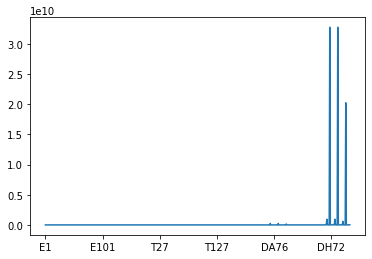

In [2]:
#Check if there are empty entries
emtpy_values = data.isnull().any().sum()

#Get the min and max values of each features
min_values = data.min()
max_values = data.max()
mean_values = data.mean()
#Get the min and max of the complete dataset
min_value = min_values.min()
max_value = max_values.max()

print('No. of empty values: ' + str(emtpy_values))
print('Max value of Dataset: ' + max_values.idxmax() +' '+ str(max_value)) #=> DH69 Highest Value of Dataset
print('Min value of Dataset: ' + min_values.idxmin() +' '+ str(min_value)) #=> T15 lowest Value of Dataset

#Plot mean values
mean_values.plot()
plt.show()

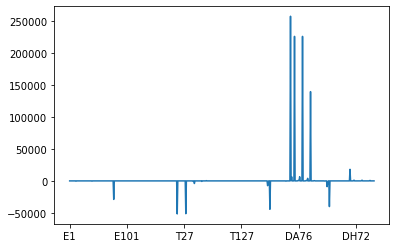

In [47]:
#Plot the minumum values

min_values.plot()
#plt.plot(data.filter(like='T15'))
plt.show()

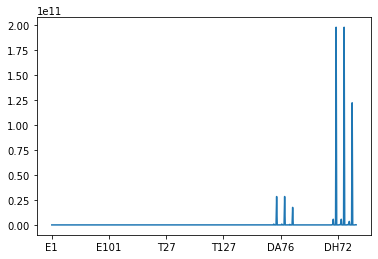

In [48]:
#Plot the maximum values

max_values.plot()
#plt.plot(data.filter(like='DH69'))
plt.show()

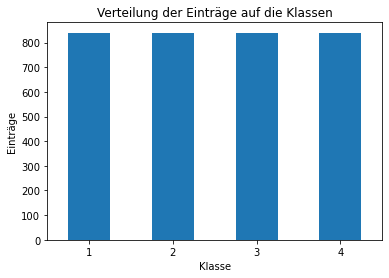

1    840
2    840
3    840
4    840
Name: class, dtype: int64


In [5]:
#Visualize a number of entries of the respective class
count_labels = labels.value_counts().sort_index()
count_labels.plot(kind = 'bar', rot=0)
plt.title("Distribution of the entries to the classes")
plt.xticks(range(4), count_labels.index)
plt.xlabel("Class")
plt.ylabel("Entries")
plt.show()
print(count_labels)

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: E1, dtype: object

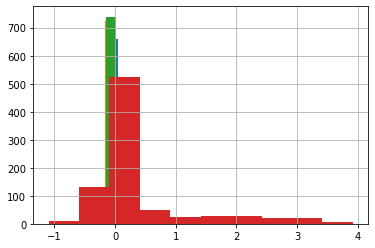

In [32]:
#Example of Histogram for feature E1 divided by classes
raw_data.groupby("class")["E1"].hist()

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: E1, dtype: object

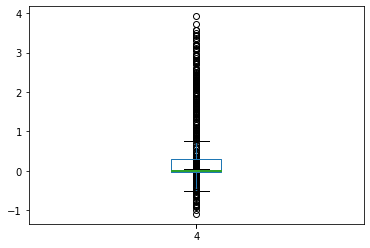

In [29]:
#Example of PlotBox for feature E1 divided by classes
raw_data.groupby("class")["E1"].plot.box()

In [6]:
#Group the max values for each feature by the classes/labels
raw_data.groupby("class").max()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,DH95,DH96,DH97,DH98,DH99,DH100,DH101,DH102,DH103,DH104
class,,,,,,,,,,,,,,,,,,,,,
1,0.417170,2.43505,0.354800,0.213432,5.34709,44.2721,4.59967,-0.070047,-0.017393,2.46567,...,31.4969,1017.92,1.218930e+11,5.24357,309.971,2533.47,950.089,121.839,240052000.0,118781000.0
2,0.926043,3.78422,0.994797,2.499670,9.04522,116.3880,4.64364,-0.080614,0.351783,4.58067,...,31.5009,1018.15,1.219090e+11,2.46912,306.762,2537.98,916.507,79.350,240080000.0,116163000.0
3,0.705446,3.64685,0.818780,0.800675,3.90313,41.6337,4.64364,-0.078047,0.037783,4.57867,...,31.4829,1017.32,1.219050e+11,3.59339,310.874,2531.11,906.781,116.223,240075000.0,118221000.0
4,3.920770,3.98512,3.872190,4.544780,1.69174,40.8789,4.64413,3.557610,3.733610,4.54878,...,31.5131,1018.63,1.224060e+11,5.71093,312.705,2565.95,950.241,138.119,241061000.0,115677000.0


In [7]:
#Group the mean values for each feature by the classes/labels
raw_data.groupby("class").mean()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,DH95,DH96,DH97,DH98,DH99,DH100,DH101,DH102,DH103,DH104
class,,,,,,,,,,,,,,,,,,,,,
1,-0.017475,0.243981,-0.037402,-0.061610,0.954442,7.804829,1.023040,-0.768425,-0.162651,0.103022,...,30.957180,993.453183,1.207874e+10,0.107940,31.862396,256.418892,97.066383,6.341561,2.379251e+07,1.468387e+07
2,-0.015612,0.318536,-0.029400,-0.056339,0.929034,8.292823,1.088637,-0.863775,-0.223899,0.185743,...,30.800889,986.255615,1.450085e+10,0.108512,37.944876,306.668996,115.955091,7.659606,2.856196e+07,1.500474e+07
3,-0.017641,0.309925,-0.032852,-0.059416,0.794899,6.787292,1.043942,-0.864484,-0.236444,0.192921,...,30.618074,977.883237,2.041706e+10,0.116704,53.012454,429.797467,161.270225,8.659461,4.021725e+07,1.506547e+07
4,0.350280,1.139876,0.387742,0.500129,-0.176472,3.893571,2.945167,-2.501302,-0.472392,1.124385,...,31.073450,998.840310,3.390359e+10,0.322602,88.339679,716.978282,275.285283,17.717995,6.681391e+07,1.754971e+07


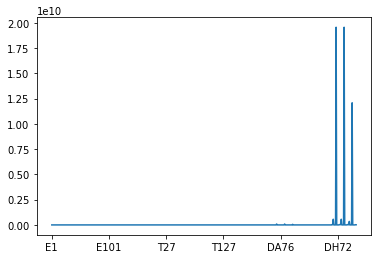

In [10]:
#Plot the mean values for each class => 3 very high mean values, can have affect if performing raw!!!
x= 533
y = raw_data.groupby("class").mean()
label_1=y.iloc[0]
label_2=y.iloc[1]
label_3=y.iloc[2]
label_4=y.iloc[3]
#plt.plot(z)
#plt.plot(z.index,z)
#label_1.plot()
label_1.plot.line()
plt.show()

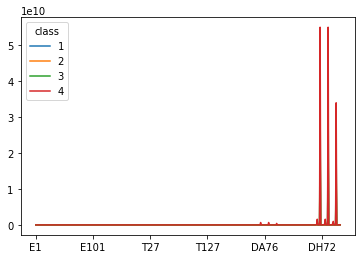

In [11]:
y_transponded = y.T
y_transponded.plot.line()
plt.show()

In [12]:
y_transponded.max()

class
1    1.955430e+10
2    2.347537e+10
3    3.305309e+10
4    5.488753e+10
dtype: float64

## 3. Preprocessing

### 3.1 Train-Test Split

In [2]:
train_data, test_data, train_labels, test_labels = train_test_split(
data, labels, test_size = 0.5, random_state=120)
#Scale Values = StandardScaler/Z-Score
train_data_stscaled = StandardScaler().fit_transform(train_data)
test_data_stscaled = StandardScaler().fit_transform(test_data)

### PCA for unscaled data

In [13]:
#PCA for reducing features for unscaled data
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data)

#Transform test data into trained pca
test_data_pca = pca.transform(test_data)

print("Initial numbers of features:", data.shape[1])
print("Reduced numbers of features:", train_data_pca.shape[1])

#plt.figure(figsize=(10,6))
#plt.scatter(train_data_pca[:,0],train_data_pca[:,0],c=train_labels, cmap='plasma')


Initial numbers of features: 533
Reduced numbers of features: 1


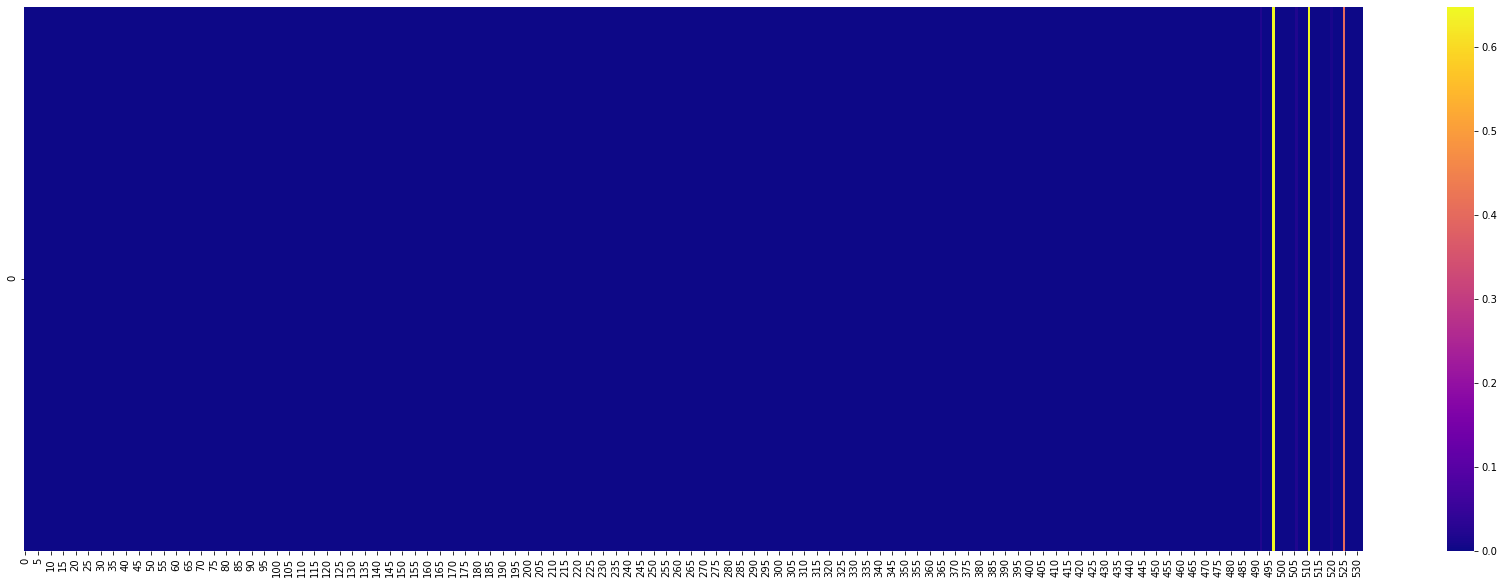

In [17]:
#Check which features has more of 99% of variance
#correlation = data.corr().abs()
#sorted_correlation = correlation.unstack().sort_values(kind="quicksort")
#print(sorted_correlation.head())
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(pca.components_,cmap='plasma',)

In [157]:
#Print the features names of the headmap
print(raw_data.iloc[:, 497].name+" & "+ raw_data.iloc[:, 511].name+" & "+ raw_data.iloc[:, 524].name)

DH69 & DH83 & DH96


The high correlation comes from the features with the highest values. DH69 has the highest mean!!!

### PCA for scaled Data

In [5]:
#PCA for reducing features
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data_stscaled)

#Transform scaled test data into trained pca
test_data_pca = pca.transform(test_data_stscaled)

print("Initial numbers of features:", data.shape[1])
print("Reduced numbers of features:", train_data_pca.shape[1])

Initial numbers of features: 533
Reduced numbers of features: 99


## Decision Tree
### Unscaled Data

In [7]:
model = DecisionTreeClassifier()
model.fit(train_data, train_labels)

predictions = model.predict(test_data)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.8726190476190476
Confusion matrix
[[386  12  13   0]
 [  3 342  70   8]
 [ 18  82 326   3]
 [  0   2   3 412]]
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.94      0.94       411
           2       0.78      0.81      0.79       423
           3       0.79      0.76      0.78       429
           4       0.97      0.99      0.98       417

    accuracy                           0.87      1680
   macro avg       0.87      0.87      0.87      1680
weighted avg       0.87      0.87      0.87      1680



In [189]:
# Create k-fold cross-validation for decision tree
kf = KFold(n_splits=500, shuffle=True, random_state=1)
# Perform k-fold cross-validation
validation_results = cross_val_score(model,test_data, test_labels, cv=kf, scoring="accuracy",n_jobs=-1) 
# Mean of validation
validation_results.mean()

0.8891666666666667

In [190]:
model = DecisionTreeClassifier()
model.fit(train_data_stscaled, train_labels)

predictions = model.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.7333333333333333
Confusion matrix
[[304  23  84   0]
 [  9 277 131   6]
 [ 42 141 244   2]
 [  0   5   5 407]]
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.74      0.79       411
           2       0.62      0.65      0.64       423
           3       0.53      0.57      0.55       429
           4       0.98      0.98      0.98       417

    accuracy                           0.73      1680
   macro avg       0.75      0.73      0.74      1680
weighted avg       0.74      0.73      0.74      1680



In [193]:
# Create k-fold cross-validation for decision tree
kf = KFold(n_splits=500, shuffle=True, random_state=1)
# Perform k-fold cross-validation
validation_results = cross_val_score(model,test_data_stscaled, test_labels, cv=kf, scoring="accuracy",n_jobs=-1) 
# Mean of validation
validation_results.mean()

0.8913333333333333

In [96]:
# Entscheidungsbaum-Klassifikatorobjekt erzeugen
decisiontree = DecisionTreeClassifier(random_state=0)
# Modell trainieren
model = decisiontree.fit(train_data, train_labels)
#model.score(features,target)
predictions = model.predict(test_data)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.7215608465608465
Confusion matrix
[[596  69  80   1]
 [ 92 447 189  24]
 [ 99 246 392  26]
 [  4   6   6 747]]
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.80      0.78       746
           2       0.58      0.59      0.59       752
           3       0.59      0.51      0.55       763
           4       0.94      0.98      0.96       763

    accuracy                           0.72      3024
   macro avg       0.71      0.72      0.72      3024
weighted avg       0.72      0.72      0.72      3024



In [97]:
minmax_scale = MinMaxScaler(feature_range=(0,1))
scaled_feature = minmax_scale.fit_transform(train_data)
test_scaled_feature = minmax_scale.fit_transform(test_data)
# Entscheidungsbaum-Klassifikatorobjekt erzeugen
decisiontree = DecisionTreeClassifier(random_state=0)
# Modell trainieren
model = decisiontree.fit(scaled_feature, train_labels)
#model.score(features,target)
predictions = model.predict(test_scaled_feature)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.49206349206349204
Confusion matrix
[[579 166   1   0]
 [161 571   9  11]
 [266 473  12  12]
 [382  38  17 326]]
Classification Report
              precision    recall  f1-score   support

           1       0.42      0.78      0.54       746
           2       0.46      0.76      0.57       752
           3       0.31      0.02      0.03       763
           4       0.93      0.43      0.59       763

    accuracy                           0.49      3024
   macro avg       0.53      0.49      0.43      3024
weighted avg       0.53      0.49      0.43      3024



In [4]:
# an SVM has several hyperparameters
# first the type of kernel has to be selected (e.g. linear, polynomial or RBF)
# a soft-margin SVM has the regularization parameter C
# in addition there are parameters for the kernels

# here: linear SVM, hard-margin 
# (hard-margin is simulated by a very large C, 
# since sklearn does not support hard-margin SVMs)
model = SVC(kernel = "linear", C=100)

# train model on training set
model.fit(train_data_stscaled, train_labels)

predictions = model.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.8595238095238096
Confusion matrix
[[390   9  12   0]
 [ 14 349  60   0]
 [ 29 109 291   0]
 [  0   1   2 414]]
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       411
           2       0.75      0.83      0.78       423
           3       0.80      0.68      0.73       429
           4       1.00      0.99      1.00       417

    accuracy                           0.86      1680
   macro avg       0.86      0.86      0.86      1680
weighted avg       0.86      0.86      0.86      1680



In [138]:
# Bibliotheken laden
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Startwert für Zufallsgenerator festlegen
np.random.seed(0)
# Gewünschte Anzahl der Merkmale festlegen
number_of_features = 5000
# Merkmale und Zieldaten laden
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data
# Merkmalsdaten in eine 1-aus-n-codierte Merkmalsmatrix konvertieren
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Zielvektor 1-aus-n codieren, um eine Zielmatrix zu erzeugen
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)
# Neuronales Netz beginnen
network = models.Sequential()
# Vollständig verbundene Schicht mit einer ReLU-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=100,
activation="relu",
input_shape=(number_of_features,)))
# Vollständig verbundene Schicht mit einer ReLU-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=100, activation="relu"))
# Vollständig verbundene Schicht mit einer Softmax-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=46, activation="softmax"))
# Neuronales Netz kompilieren
network.compile(loss="categorical_crossentropy", # Kreuzentropie
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Performancemetrik Genauigkeit
# Neuronales Netz trainieren
history = network.fit(features_train, # Merkmale
target_train, # Ziel
epochs=3, # Drei Epochen
verbose=0, # Keine Ausgabe
batch_size=100, # Anzahl der Beobachtungen pro Batch
validation_data=(features_test, target_test)) # Testdaten
print(features_train.shape)

(8982, 5000)


In [130]:
print(type(data_train[0]))
print(features_train)
t = np.asmatrix(train_data_stscaled)
#print(t)
a=0 
for i in t:
    #list2 = i.tolist()
    t[i]= []
    t[i].append(i)
    a = a+1
    if(a>2):
        break
print(t)

<class 'list'>
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


IndexError: arrays used as indices must be of integer (or boolean) type

In [71]:
#print(type(list2))
print(train_labels.to_numpy() - 1)
print(type(train_labels.to_numpy()))

[3 0 2 ... 2 2 0]
<class 'numpy.ndarray'>


In [16]:
# Bibliotheken laden
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Startwert für Zufallsgenerator festlegen
np.random.seed(0)
# Gewünschte Anzahl der Merkmale festlegen
number_of_features = 533
# Merkmale und Zieldaten laden
#data = reuters.load_data(num_words=number_of_features)
#(data_train, target_vector_train), (data_test, target_vector_test) = data
# Merkmalsdaten in eine 1-aus-n-codierte Merkmalsmatrix konvertieren
tokenizer = Tokenizer(num_words=number_of_features)
features_train = np.asmatrix(train_data_stscaled)
features_test = np.asmatrix(test_data_stscaled)

# Zielvektor 1-aus-n codieren, um eine Zielmatrix zu erzeugen
target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
target_test = to_categorical(test_labels.to_numpy()-1, num_classes=4)
# Neuronales Netz beginnen
network = models.Sequential()
# Vollständig verbundene Schicht mit einer ReLU-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=100,activation="relu",input_shape=(number_of_features,)))
# Vollständig verbundene Schicht mit einer ReLU-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=250, activation="relu"))
# Vollständig verbundene Schicht mit einer Softmax-Aktivierungsfunktion hinzufügen
network.add(layers.Dense(units=4, activation="softmax"))
#network.add(layers.Dense(units=4, activation="sigmoid"))
# Neuronales Netz kompilieren
network.compile(loss="categorical_crossentropy", # Kreuzentropie
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Performancemetrik Genauigkeit
print(features_train.shape)
print(target_train.shape)
print(target_train)

# Callback-Funktionen einrichten, um Training frühzeitig zu stoppen und das
# bislang beste Modell zu speichern
callbacks = [EarlyStopping(monitor="val_loss", patience=50),
ModelCheckpoint(filepath="best_model.h5",
monitor="val_loss",
save_best_only=True)]

# Neuronales Netz trainieren
history = network.fit(features_train, # Merkmale
target_train, # Ziel
epochs=100,
callbacks=callbacks,
verbose=0, # Keine Ausgabe
batch_size=30, # Anzahl der Beobachtungen pro Batch
validation_data=(features_test, target_test)) # Testdaten

(1680, 533)
(1680, 4)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [13]:
predicted_target = network.predict(features_test)
predicted_target[800].round()
blind_test_value = raw_data
#blind_test_value.pop('class')
blind_test_value = StandardScaler().fit_transform(blind_test_value)

#print(blind_test_value[3000])
blind_test_v = np.asmatrix(blind_test_value[307])
predicted_target = network.predict(blind_test_v)
predicted_target.round()

array([[0., 1., 0., 0.]], dtype=float32)

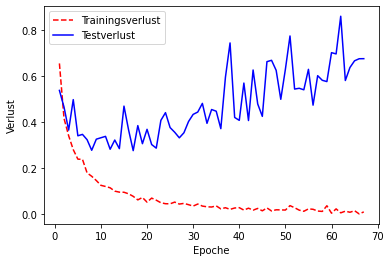

In [18]:
# Die Verläufe von Trainings- und Testverlusten abrufen
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Zähler für die Anzahl der Epochen erstellen
epoch_count = range(1, len(training_loss) + 1)

# Verlustverlauf visualisieren
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

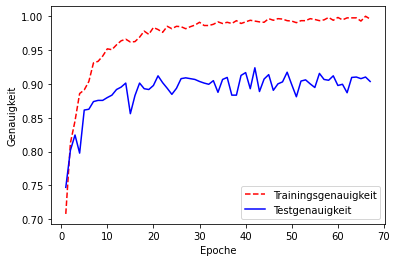

In [24]:
# Verläufe von Trainings- und Testgenauigkeit abrufen
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Genauigkeitsverlauf visualisieren
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
fig1 = plt.gcf()
plt.show()


In [25]:
plt.draw()
fig1.savefig('Neuronales_Netz_Genauigkeit.png', dpi=100)

<Figure size 432x288 with 0 Axes>